## Определение перспективного тарифа для телеком компании

### Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание трарифов

##### Тариф «Смарт»
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета: 
минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.) 
сообщение: 3 рубля   
1 Гб интернет-трафика: 200 рублей 
##### Тариф «Ультра»  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика    
Стоимость услуг сверх тарифного пакета:  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей  

### План выполнения работы

Шаг 1. Открыть файл с данными и изучить общую информацию   
Шаг 2. Подготовить данные   
Шаг 3. Проанализировать данные   
Шаг 4. Проверить гипотезы   
Шаг 5. Написать общий вывод  

### Описание данных

#### Таблица users

user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы)   
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
city — город проживания пользователя  
tariff — название тарифного плана  

#### Таблица calls 
  
id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок  

#### Таблица messages

id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение   

#### Таблица internet

id — уникальный номер сессии  
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  

#### Таблица tariffs

tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета   
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

### Шаг 1. Открыть  файл с данными и изучить общую информацию.

In [2]:
import pandas as pd 

In [3]:
users = pd.read_csv('/datasets/users.csv')


In [4]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


##### Замечания 
1. столбец reg_date лучше перевети в тип datetime
2. в churn_date избавиться от пропусков 

In [6]:
calls = pd.read_csv('/datasets/calls.csv')

In [7]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


##### Замечания 
1. возможно в будущем стоит поменять тип столбца id
2. call_date лучше перевести в тип datetime
3. duration стоит округлить вверх согласно политике компании, а также перевести в int т.к. значения 
посе округления будут целочисленными 


In [9]:
messages = pd.read_csv('/datasets/messages.csv')

In [10]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
internet = pd.read_csv('/datasets/internet.csv')

In [13]:
internet.head(5)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [15]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [16]:
tariffs.head(5)

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Вывод 

### Шаг 2. Подготовить данные

#### 1. Замена пропусков 

In [18]:
users['churn_date'] = users['churn_date'].fillna(0) # заменим пропуски на 0, пожалуй они не введут 
                                                    # в заблуждение в дальнейшем

In [19]:
users.info() # убедимся, что пропусков не осталось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### 2. Приведение данных к нужным типам

In [20]:
# для таблицы users
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d') 
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [22]:
# для таблицы calls
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d') 

In [23]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [24]:
# для таблицы messages
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d') 

In [25]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [26]:
# для таблицы internet 
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d') 


In [27]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


#### 3. Исправление ошибок в данных

##### таблица users 

In [28]:

#рассмотрим уникальные значения для каждого столбца 
for i in users.columns:
    print(i)
    print(users[i].unique())
    print()

user_id
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 119

In [29]:
#изучим количество уникальные значения для всех столбцов
for i in users.columns:
    print(users[i].value_counts())

1023    1
1194    1
1181    1
1182    1
1183    1
       ..
1362    1
1363    1
1364    1
1365    1
1024    1
Name: user_id, Length: 500, dtype: int64
53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64
1970-01-01    462
2018-10-14      2
2018-12-21      2
2018-12-09      2
2018-12-03      2
2018-10-03      2
2018-12-18      1
2018-10-28      1
2018-09-27      1
2018-11-16      1
2018-10-25      1
2018-09-02      1
2018-12-23      1
2018-11-22      1
2018-10-05      1
2018-12-20      1
2018-12-26     

Ошибок в в данных в таблице users не обнаружено

##### таблица calls

In [30]:
for i in calls.columns:
    print(i)
    print(calls[i].unique())
    print()

id
['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']

call_date
['2018-07-25T00:00:00.000000000' '2018-08-17T00:00:00.000000000'
 '2018-06-11T00:00:00.000000000' '2018-09-21T00:00:00.000000000'
 '2018-12-15T00:00:00.000000000' '2018-11-02T00:00:00.000000000'
 '2018-10-18T00:00:00.000000000' '2018-08-22T00:00:00.000000000'
 '2018-09-15T00:00:00.000000000' '2018-08-15T00:00:00.000000000'
 '2018-05-28T00:00:00.000000000' '2018-07-05T00:00:00.000000000'
 '2018-09-29T00:00:00.000000000' '2018-12-11T00:00:00.000000000'
 '2018-07-27T00:00:00.000000000' '2018-08-11T00:00:00.000000000'
 '2018-08-02T00:00:00.000000000' '2018-06-15T00:00:00.000000000'
 '2018-12-04T00:00:00.000000000' '2018-08-20T00:00:00.000000000'
 '2018-09-25T00:00:00.000000000' '2018-07-21T00:00:00.000000000'
 '2018-08-27T00:00:00.000000000' '2018-08-25T00:00:00.000000000'
 '2018-12-12T00:00:00.000000000' '2018-07-19T00:00:00.000000000'
 '2018-11-14T00:00:00.000000000' '2018-12-26T00:00:00.000000000'
 '2018-12-

In [31]:
for i in calls.columns:
    print(calls[i].value_counts())

1217_510    1
1163_21     1
1382_27     1
1198_14     1
1185_305    1
           ..
1048_11     1
1366_38     1
1090_16     1
1385_265    1
1027_186    1
Name: id, Length: 202607, dtype: int64
2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64
0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64
1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64


In [32]:
calls.query('duration <= 0.00')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


Обнаружено очень много значений продолжительностью 0.0 в столбце duration, вероятно это связано техни
ческими проблемами оператора во время сбора статистики. Также предоложительно это могут быть неприянятые звонки. Менять значения с 0.0 на -1 или на еще какое-нибудь заметное значение, чтобы как-то выделить такого рода аномальные данные я не буду, т.к. это создаст неудобства при подсчете прибыли. Включать примерно четверть звонков нулевой длительности в дальнейшие расчеты на мой взгляд тоже
не имеет смылса т.к. она сможет значительно изменить результаты алгебраических метрик.  

In [33]:
calls = calls.query('duration > 0.00') #избавимся от записей с нулевыми значениями

In [34]:
for i in calls.columns:
    print(calls[i].value_counts())

1086_235     1
1363_125     1
1481_199     1
1247_179     1
1099_325     1
            ..
1377_1437    1
1359_465     1
1452_12      1
1419_264     1
1027_186     1
Name: id, Length: 162994, dtype: int64
2018-12-31    1173
2018-12-30     959
2018-12-29     959
2018-12-22     957
2018-12-18     942
              ... 
2018-01-07      15
2018-01-06      14
2018-01-02       6
2018-01-01       4
2018-01-03       3
Name: call_date, Length: 365, dtype: int64
4.49     142
5.50     142
6.38     141
6.15     141
4.92     139
        ... 
25.67      1
27.19      1
28.87      1
26.07      1
27.63      1
Name: duration, Length: 2870, dtype: int64
1377    1424
1168    1384
1375    1270
1453    1145
1196     978
        ... 
1397      27
1442      23
1373      17
1016      14
1257       7
Name: user_id, Length: 492, dtype: int64


##### таблица messages

In [35]:
for i in messages.columns:
    print(i)
    print(messages[i].unique())
    print()

id
['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']

message_date
['2018-06-27T00:00:00.000000000' '2018-10-08T00:00:00.000000000'
 '2018-08-04T00:00:00.000000000' '2018-06-16T00:00:00.000000000'
 '2018-12-05T00:00:00.000000000' '2018-06-20T00:00:00.000000000'
 '2018-11-19T00:00:00.000000000' '2018-10-29T00:00:00.000000000'
 '2018-06-25T00:00:00.000000000' '2018-12-18T00:00:00.000000000'
 '2018-05-30T00:00:00.000000000' '2018-07-06T00:00:00.000000000'
 '2018-08-20T00:00:00.000000000' '2018-10-30T00:00:00.000000000'
 '2018-09-14T00:00:00.000000000' '2018-08-28T00:00:00.000000000'
 '2018-06-29T00:00:00.000000000' '2018-07-07T00:00:00.000000000'
 '2018-05-29T00:00:00.000000000' '2018-05-28T00:00:00.000000000'
 '2018-08-15T00:00:00.000000000' '2018-07-29T00:00:00.000000000'
 '2018-12-07T00:00:00.000000000' '2018-12-25T00:00:00.000000000'
 '2018-10-31T00:00:00.000000000' '2018-07-30T00:00:00.000000000'
 '2018-11-05T00:00:00.000000000' '2018-12-15T00:00:00.000000000'
 '2018-

In [36]:
for i in messages.columns:
    print(messages[i].value_counts())

1217_510     1
1257_250     1
1050_35      1
1076_830     1
1155_31      1
            ..
1356_1084    1
1368_74      1
1410_79      1
1014_75      1
1350_161     1
Name: id, Length: 123036, dtype: int64
2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-28    699
             ... 
2018-01-07     12
2018-01-02     10
2018-01-04     10
2018-01-05     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64
1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64


Ошибок в данных в таблице messages не обнаружено

##### таблица internet

In [37]:
for i in internet.columns:
    print(i)
    print(internet[i].unique())
    print()

id
['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']

mb_used
[ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]

session_date
['2018-11-25T00:00:00.000000000' '2018-09-07T00:00:00.000000000'
 '2018-06-25T00:00:00.000000000' '2018-08-22T00:00:00.000000000'
 '2018-09-24T00:00:00.000000000' '2018-10-02T00:00:00.000000000'
 '2018-07-11T00:00:00.000000000' '2018-10-08T00:00:00.000000000'
 '2018-09-03T00:00:00.000000000' '2018-09-27T00:00:00.000000000'
 '2018-08-28T00:00:00.000000000' '2018-06-20T00:00:00.000000000'
 '2018-08-09T00:00:00.000000000' '2018-08-11T00:00:00.000000000'
 '2018-07-21T00:00:00.000000000' '2018-06-09T00:00:00.000000000'
 '2018-06-03T00:00:00.000000000' '2018-11-01T00:00:00.000000000'
 '2018-11-28T00:00:00.000000000' '2018-08-20T00:00:00.000000000'
 '2018-12-06T00:00:00.000000000' '2018-07-02T00:00:00.000000000'
 '2018-10-19T00:00:00.000000000' '2018-10-30T00:00:00.000000000'
 '2018-06-17T00:00:00.000000000' '2018-11-06T00:00:00.000000000'
 '2018-09

In [38]:
for i in internet.columns:
    print(internet[i].value_counts())

1289_20     1
1144_213    1
1312_104    1
1262_445    1
1370_372    1
           ..
1433_316    1
1466_63     1
1370_369    1
1079_126    1
1350_161    1
Name: id, Length: 149396, dtype: int64
0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64
2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-01       3
2018-01-02       3
Name: session_date, Length: 365, dtype: int64
1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64


Обнаружено много (~19000) значений 0.00 в mb_used. Вероятно это связано с техническими проблемами оператора во время сбора статистики. Также  предоложительно это могут быть включения "сотовых данных" без расхода траффика. Как и в случае с calls эти значения я учитывать не буду.

In [39]:
internet = internet.query('mb_used > 0.00')

#### 4. Округление значений 

In [40]:
# в таблице calls столбец duration стоит округлить вверх согласно политике компании, а также перевести в int т.к. значения 
#посе округления будут целочисленными

In [41]:
import numpy as np 

In [42]:
calls['duration'] = calls['duration'].apply(np.ceil) #округлим столбец к бОльшему значению

In [43]:
calls.head(5) #проверим изменения

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000


In [44]:
calls['duration'] = calls['duration'].astype('int') #переведем в int

#### 5. Проверка на наличие дубликатов

In [45]:
users.duplicated().sum()

0

In [46]:
calls.duplicated().sum()

0

In [47]:
internet.duplicated().sum()

0

In [48]:
messages.duplicated().sum()

0

#### 5. Удаление выбросов 

Удалим выбросы в таблице calls в столбце duration и в таблице internet в столбце mb_used. Я выбрал 
именно эти столбцы т.к. они придставленны такими количественными переменными, которые имеют большое
разнообразие значений. В других столбцах разных таблиц тоже присутствуют колличественные переменные, однако их удаление их значений на мой взгляд бессмысленно.

In [49]:
import matplotlib.pyplot as plt 

In [50]:
# Создадим функцию для автоматизации постраения диаграмм размаха по необходимым столбцам
# В функции я также попытался использовать метод query вместо loc, однако попытка провалилась. Её я закомментировал. 

def graph_creator(list, data_frame): 
    print('Диаграммы размаха')
    for column in list: # list - спиок необходимых столбцов для анализа
        info = data_frame[column].describe()# получаем информацию о первом (Q1) и третьем квартилях (Q2)  
        q1 = info[4]
        q3 = info[6]
        iqr = q3 - q1   # считаем межквартильный размах
        border = iqr*1.5   # cчитаем расстояние от Q1 и Q2 до границы, за которой расположены выбросы
        plt.ylim(-0.8*border, q3 + border + 0.8*border) 
        data_frame.boxplot(column = column)  # строим диаграмму размаха
        plt.show()
        print('')
        print('Избавляемся от выбросов для столбца {}, значения \n которых больше Q3 + 1.5*IQR ({:.3f}) и меньше Q1 - 1.5*IQR ({:.3f}).'.format(column, q3 + border,q1 - border))
        #    попытка сразу избавиться от выбросов №1 :                                                                          
        #improved_data = data.query('@q1 - @border <= data[@column] <= @q3 + @border')
        #    попытка избавиться от выбросов #2                                                                                                            
        data_frame[column] = data_frame.loc[     #условие, ограничивающее нужные значения от выбросов
            (data_frame[column] >= (q1 - border)) &  
            (data_frame[column] <= (q3 + border)),
            column
         ]
        print('')
        print('Значения-выбросы удалены')
        print('')
        print('')
    return data_frame

Диаграммы размаха


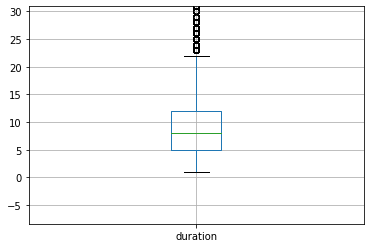


Избавляемся от выбросов для столбца duration, значения 
 которых больше Q3 + 1.5*IQR (22.500) и меньше Q1 - 1.5*IQR (-5.500).

Значения-выбросы удалены




In [51]:
calls = graph_creator(['duration'], calls)

In [52]:
# проверим сколько значений мы удалили:
calls['duration'].isna().sum()

2229

Диаграммы размаха


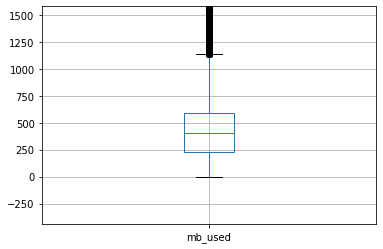


Избавляемся от выбросов для столбца mb_used, значения 
 которых больше Q3 + 1.5*IQR (1141.179) и меньше Q1 - 1.5*IQR (-320.771).

Значения-выбросы удалены




In [53]:
internet = graph_creator(['mb_used'], internet)

In [54]:
# проверим сколько значений мы удалили:
internet['mb_used'].isna().sum()

857

#### 7. Расчеты

##### количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя

In [55]:
#для начала добавим столбецы c месяцеми в каждцю из таблиц
calls['month'] = calls['call_date'].dt.month
calls_months = calls.merge(users, on = 'user_id', how = 'left') #соединяем с users, чтобы получить 
# от туда значения трафика

In [56]:
calls_months = calls_months.pivot_table(index = ['user_id', 'month', 'tariff'], values = 'duration', aggfunc = ['count', 'sum'])

In [57]:
#переименуем столбцы
calls_months.columns = ['calls_count', 'calls_duration']


In [58]:
calls_months

calls_count  calls_duration
user_id month tariff                             
1000    5     ultra            17           159.0
        6     ultra            28           172.0
        7     ultra            41           340.0
        8     ultra            41           384.0
        9     ultra            46           466.0
...                           ...             ...
1498    10    smart            30           247.0
1499    9     smart             7            45.0
        10    smart            44           449.0
        11    smart            61           587.0
        12    smart            56           492.0

[3168 rows x 2 columns]

##### количество отправленных сообщений по месяцам

In [59]:
#создадим столбец с месяцом 
messages['month'] = messages['message_date'].dt.month
messages_months = messages.merge(users, on = 'user_id', how = 'left') #соединяем с users, чтобы получить 
# от туда значения трафика
#беру left, т.к. интересуют только те user_id, о которых идет речь в контексте сообщений 

In [60]:
messages_months = messages_months.pivot_table(index = ['user_id', 'month', 'tariff'], values = 'id', aggfunc = 'count')

In [61]:
messages_months.head(10)

id
user_id month tariff    
1000    5     ultra   22
        6     ultra   60
        7     ultra   75
        8     ultra   81
        9     ultra   57
        10    ultra   73
        11    ultra   58
        12    ultra   70
1002    6     smart    4
        7     smart   11

In [62]:
messages_months.columns = ['messages_count']

##### объем израсходованного интернет-трафика по месяцам

In [63]:
internet['month'] = internet['session_date'].dt.month 

In [64]:
internet_months = internet.merge(users, on = 'user_id', how = 'left')

In [65]:
internet_months = internet_months.pivot_table(index = ['user_id', 'month', 'tariff'], values = 'mb_used', aggfunc = 'sum')

In [66]:
internet_months.head()

mb_used
user_id month tariff          
1000    5     ultra    2253.49
        6     ultra   22036.51
        7     ultra   14003.64
        8     ultra   14055.93
        9     ultra   14568.91

##### помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана)

In [67]:
#склеим предыдущие таблицы. Применим merge() c параметром how = outer т.к нам важны все услуги, предо-
#ставленные пользователю
months_stat = calls_months.merge(messages_months, on = ['user_id', 'month', 'tariff'], how = 'outer').merge(
    internet_months, on = ['user_id', 'month', 'tariff'], how = 'outer')

In [68]:
months_stat.head(5)

calls_count  calls_duration  messages_count   mb_used
user_id month tariff                                                       
1000    5     ultra          17.0           159.0            22.0   2253.49
        6     ultra          28.0           172.0            60.0  22036.51
        7     ultra          41.0           340.0            75.0  14003.64
        8     ultra          41.0           384.0            81.0  14055.93
        9     ultra          46.0           466.0            57.0  14568.91

In [69]:
months_stat = months_stat.reset_index(level=['user_id', 'month', 'tariff']) #избавимся от мультииндекса для
#удобства дальнейших расчетов

In [70]:
months_stat.head()

,user_id,month,tariff,calls_count,calls_duration,messages_count,mb_used
0,1000,5,ultra,17.0,159.0,22.0,2253.49
1,1000,6,ultra,28.0,172.0,60.0,22036.51
2,1000,7,ultra,41.0,340.0,75.0,14003.64
3,1000,8,ultra,41.0,384.0,81.0,14055.93
4,1000,9,ultra,46.0,466.0,57.0,14568.91


In [71]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [72]:
import math

In [73]:
#расчет прибыли для каждой строки тоблицы
#я не стал использовать для расчетов таблицу tariffs, потому что мне это показалось еще сложнее, 
#чем код ниже

income = [] # здесь будет хранится список из прибылей каждого клиента по порядку по месяцам
for i in range(len(months_stat)):
    total_income_per_string = 0
    
    if months_stat.loc[i, 'tariff'] == 'ultra':
        tariff_price = 1950
        income_calls = 0            #если потрачено минут звонков за месяц больше бесплатного лимита
        if (3000 - months_stat.loc[i, 'calls_duration']) < 0: #то разность отрицательная => доплата
            income_calls += (abs(3000 - months_stat.loc[i, 'calls_duration'])*1)
            
        income_messages = 0
        if (1000 - months_stat.loc[i, 'messages_count']) < 0: 
            income_messages += (abs(1000 - months_stat.loc[i, 'messages_count'])*1)
            
        income_internet = 0
        if (30720 - months_stat.loc[i, 'mb_used']) < 0:
            #получаем положительное значение делим на 1024 и получаем количество Гб
            #окугляем количество гб до целого значения к потолку с помощью ceil и умножаем на цену за
            #один Гб
            income_internet += (math.ceil((abs(30720 - months_stat.loc[i, 'mb_used'])/1024))) * 150 
            
        total_income_per_string = income_calls + income_messages + income_internet + tariff_price
        income.append(total_income_per_string)
        
    if months_stat.loc[i, 'tariff'] == 'smart':
    
        tariff_price = 550 
        income_calls = 0            #если потрачено минут звонков за месяц больше бесплатного лимита
        if (3000 - months_stat.loc[i, 'calls_duration']) < 0: #то разность отрицательная => доплата
            income_calls += (abs(500 - months_stat.loc[i, 'calls_duration'])*3)
            
        income_messages = 0
        if (1000 - months_stat.loc[i, 'messages_count']) < 0: 
            income_messages += (abs(50 - months_stat.loc[i, 'messages_count'])*3)
            
        income_internet = 0
        if (15360 - months_stat.loc[i, 'mb_used']) < 0:
            #получаем положительное значение делим на 1024 и получаем количество Гб
            #окугляем количество гб до целого значения к потолку с помощью ceil и умножаем на цену за
            #один Гб
            income_internet += (math.ceil((abs(15360 - months_stat.loc[i, 'mb_used'])/1024))) * 200 
            
        total_income_per_string = income_calls + income_messages + income_internet + tariff_price
        income.append(total_income_per_string)
       


In [74]:
income = pd.DataFrame(data = income, columns = ['income'])  #создадим Series, которы затем добавим в осн таблицу


In [75]:
months_stat['income'] = income # добавим столбец с прибылью по месяцам 

In [76]:
months_stat.head(50)

,user_id,month,tariff,calls_count,calls_duration,messages_count,mb_used,income
0,1000,5,ultra,17.0,159.0,22.0,2253.49,1950
1,1000,6,ultra,28.0,172.0,60.0,22036.51,1950
2,1000,7,ultra,41.0,340.0,75.0,14003.64,1950
3,1000,8,ultra,41.0,384.0,81.0,14055.93,1950
4,1000,9,ultra,46.0,466.0,57.0,14568.91,1950
5,1000,10,ultra,43.0,327.0,73.0,14702.49,1950
6,1000,11,ultra,36.0,313.0,58.0,12142.68,1950
7,1000,12,ultra,37.0,309.0,70.0,9817.61,1950
8,1001,11,smart,45.0,430.0,NaN,18429.34,1150
9,1001,12,smart,47.0,414.0,NaN,14036.66,550


In [77]:
#расчитаем прибыль от каждого клиента
client_income = months_stat.pivot_table(index = 'user_id', values = 'income', aggfunc = 'sum')


In [78]:
client_income.head(50)

,income
user_id,
1000,15600
1001,1700
1002,7250
1003,9750
1004,15600
1005,6600
1006,9850
1007,7150
1008,550


### Вывод

На данном этапе были проделаны следующие действия :

##### 1. Замена пропусков  
Заменил пропускки столбца churn_date на нули, для дальнейшего изменения типа данных в datetime


##### 2. Изменение типа данных   
Во всех таблицах,  имеющих столбцы с датой, я изменил тип данных с object на datetime


##### 3. Исправление ошибок в данных   
 Я удалил 0.0 значения столбца duration в таблице calls, хоть они и составляют ~ 1/4 всех значений и их наличие больше исказит алгебраические метрики, чем сохраниние. То же самое проделал с таблицей 
internet в столбце mb_used, где нулевых значений тоже ощутимо много (~ 19 тыс).  

##### 4. Округление значений  
Округлил значения столбца таблицы до ближайших верхних целых значений и перевел столбец в int

##### 5. Проверка на наличие дубликатов  
Дубликаты не обнаружены

##### 6. Удаление выбросов  
Были удалены выбросы в таблицах calls (ст. duration) и intenet (ст. mb_used)


##### 7. Произведены расчеты для каждого пользователя

1. количество сделанных звонков и израсходованных минут разговора по месяцам;  
2. количество отправленных сообщений по месяцам;  
2. объем израсходованного интернет-трафика по месяцам;  
3. помесячная выручка с каждого пользователя.  

### Шаг 3. Анализ данных

Проведем сравнительный анализ двух тарифов и узнаем, как распределяется пользовательская аудитория 
по трем предоставляемым услугам : звонки, сообщения и интернет. 

In [79]:
import numpy as np 

#### Звонки 

#### Smart

In [80]:
months_stat.head()

,user_id,month,tariff,calls_count,calls_duration,messages_count,mb_used,income
0,1000,5,ultra,17.0,159.0,22.0,2253.49,1950
1,1000,6,ultra,28.0,172.0,60.0,22036.51,1950
2,1000,7,ultra,41.0,340.0,75.0,14003.64,1950
3,1000,8,ultra,41.0,384.0,81.0,14055.93,1950
4,1000,9,ultra,46.0,466.0,57.0,14568.91,1950


In [81]:
months_smart = months_stat.query('tariff == "smart"')

In [82]:
months_smart['calls_duration'].describe() # получим среднее и дисперсию 

count    2221.000000
mean      403.632598
std       182.263548
min         2.000000
25%       271.000000
50%       406.000000
75%       527.000000
max      1340.000000
Name: calls_duration, dtype: float64

In [83]:
#найдем дисперсию 
np.var(months_smart['calls_duration'])

33205.043764029695

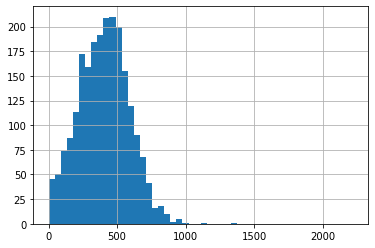

In [84]:
months_smart['calls_duration'].hist(range = (0, 2221), bins = 50 )

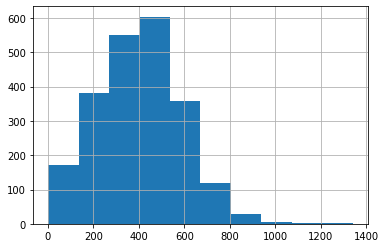

In [85]:
months_smart['calls_duration'].hist()

Расспределение Пуассоновское, стремящееся к нормальному т.к. мы рассматриваем много значений.   Пуассоновское т.к. описывает число событий в единицу времени.   
Скошенность вправо   
Среднее значение 403   
Стандартное отклонение 182  
Дисперсия 33205  

 

#### Ultra

In [86]:
months_ultra = months_stat.query('tariff == "ultra"')

In [87]:
months_ultra['calls_duration'].describe()

count     947.000000
mean      526.080253
std       294.263035
min         1.000000
25%       304.500000
50%       506.000000
75%       732.000000
max      1545.000000
Name: calls_duration, dtype: float64

In [88]:
np.var(months_ultra['calls_duration'])

86499.29662168866

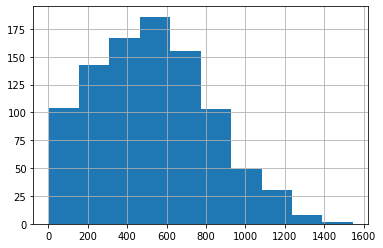

In [89]:
months_ultra['calls_duration'].hist()

Расспределение Пуассоновское. Пуассоновское т.к. описывает число событий в единицу времени.  
Скошенность вправо   
Среднее значение 526  
Стандартное отклонение 294  
Дисперсия 86499  

#### Вывод по звонкам

1. Гистограмы для обоих тарифов отражают Пуассоновское распределение, как и ожидалось. Аномалий не обнаружилось. У обоих скошенность вправо.   

2. Пользователи ultra в среднем говорят на 123 минуты дольше пользователей smart

3. Разброс для обоих тарифов не слишком большой, т.к. меньше среднего. Пользоватили smart в использовании минут больше придерживаются среднего значения (std 182), чем пользователи ultra(std 294).

4. Дисперсии для smart и ultra 33205 и 86499 соответсвенно. Они приблизительно соответстыуют квадратам стандартных отклонений, а значит в качестве меры разброса можно оставить std.  


#### Сообщения 

#### smart

In [90]:
months_smart['messages_count'].describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages_count, dtype: float64

In [91]:
np.var(months_smart['messages_count'])

717.220843110227

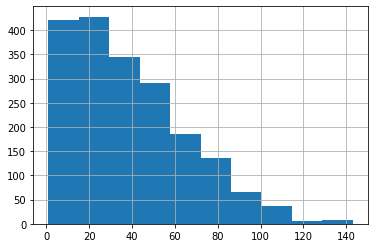

In [92]:
months_smart['messages_count'].hist()

In [93]:
#гистограмма получилась подозрительной слишком много значений между 0 и 20. Расмотрим поближе
months_smart['messages_count'].value_counts() 


20.0     39
16.0     38
13.0     37
14.0     36
25.0     35
         ..
110.0     1
114.0     1
125.0     1
127.0     1
129.0     1
Name: messages_count, Length: 123, dtype: int64

Опасения были напрасы, видимо сообщения действительно не пользуются особой популярностью популярностью. Около 30 смсок в месяц на пользователя

Расспределение должно было быть похоже  на нормальное. Заметно изобилие нулевых значений. При детальном рассмотрени значений от 0 до 20, выяснилось, что они распределены адекватно.  
Скошенность вправо  
Среднее значение 38.71   
Стандартное отклонение 26.78  
Дисперсия 717.22   

#### ultra 

In [94]:
months_ultra['messages_count'].describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: messages_count, dtype: float64

In [95]:
np.var(months_ultra['messages_count'])

2107.0055235156838

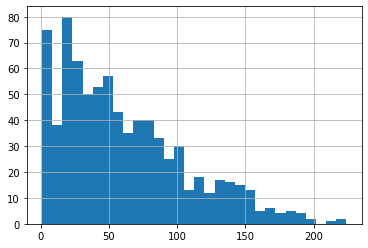

In [96]:
months_ultra['messages_count'].hist(bins = 30)

In [97]:
months_ultra['messages_count'].value_counts().sort_values()

120.0     1
183.0     1
139.0     1
169.0     1
197.0     1
         ..
17.0     12
4.0      12
40.0     13
20.0     13
6.0      13
Name: messages_count, Length: 177, dtype: int64

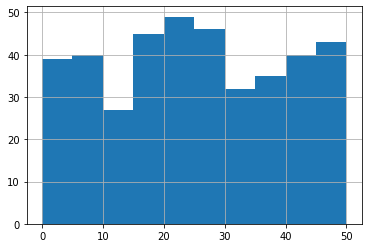

In [98]:
months_ultra['messages_count'].hist(range = (0,50))

Расспределение должно было быть похоже на нормальное. Заметны резкие перепады до 50 сообщений  
Скошенность вправо  
Среднее значение 61.16  
Стандартное отклонение 45.93  
Дисперсия 2107.00   

#### Вопрос наставнику

Не могу понять, чем объясняются такие скачки в распределении на гистограмме, которое, как я понял, должно быть похоже на нормальное, или хотя бы стремится стремиться к нему ? 

#### Вывод по сообщениям
1. Оба распределения не похожи на нормальное. Для обоих датасетов скошенность вправо  
2. Пользователи ultra пишут сообщения в среднем в полтора раза чаще (~ 1,57), чем smart  
3. Количество сообщения пользователей ultra разнообразней пользователей смарт примерно в два раза (std: 45.93 и 26.78)  
4. Дисперсии для smart и ultra равны 33205 и 86499 соответсвенно. Они приблизительно соответстыуют   квадратам стандартных отклонений, а значит в качестве меры разброса можно оставить std.    

#### Интернет

#### smart

In [99]:
months_smart['mb_used'].describe()

count     2227.000000
mean     16077.322892
std       5795.644052
min        201.070000
25%      12576.635000
50%      16302.930000
75%      19901.995000
max      38552.450000
Name: mb_used, dtype: float64

In [100]:
np.var(months_smart['mb_used'])

33574407.140547454

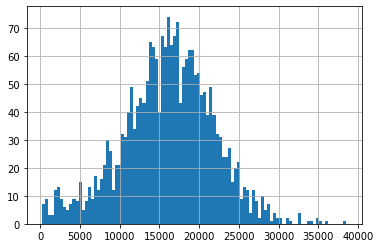

In [101]:
months_smart['mb_used'].hist(bins = 100)

Расспределение должно было быть похоже на нормальное и соответствует ему.   
Скошенности нет  
Среднее значение 16077.32    
Стандартное отклонение 5795.64   
Дисперсия 33574407.14 

#### ultra

In [102]:
months_ultra['mb_used'].describe()

count      974.000000
mean     18925.900175
std       9531.383006
min        365.090000
25%      11525.152500
50%      18593.120000
75%      25875.470000
max      45874.280000
Name: mb_used, dtype: float64

In [103]:
np.var(months_ultra['mb_used'])

90753989.6577512

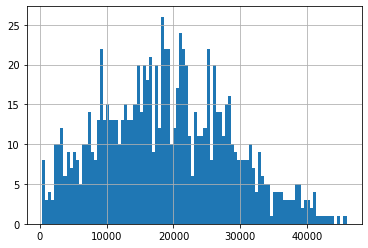

In [104]:
months_ultra['mb_used'].hist(bins = 100)


In [105]:
months_ultra['mb_used'].value_counts().sort_values() # проверим на повторы

365.09      1
15366.71    1
18182.96    1
21667.98    1
22115.16    1
           ..
12769.34    1
19496.88    1
16303.33    1
3805.39     1
1904.00     1
Name: mb_used, Length: 974, dtype: int64

Расспределение должно быть похоже на нормальное и соответствует ему.   
Скошенности нет  
Среднее значение  18925.90    
Стандартное отклонение 9531.38   
Дисперсия 90753989.65 

#### Вывод по интернету

1. Распределение нормальное для обоих тарифов. Скошенности нет  
2. Пользоватиле ultra (18925.90) в среднем используют примерно на 3Гб больше траффика, чем пользователи smart (16077.32)   
3. Кол-во использованных Гб у пользователей ultra в ~1.6 раз чаще отличаются от среднего, чем у smart
4. Дисперсии приблизительно соответстыуют квадратам стандартных отклонений, а значит в качестве меры разброса можно оставить std  

### Вывод


#### Вывод по звонкам
1. Гистограмы для обоих тарифов отражают Пуассоновское распределение, как и ожидадось. Аномалий не обнаружилось. У обоих скошенность вправо.   
2. Пользователи ultra в среднем говорят на 123 минуты дольше пользователей smart
3. Разброс для обоих тарифов не слишком большой, т.к. меньше среднего. Пользоватили smart в использовании минут больше придерживаются среднего значения (std 182), чем пользователи ultra(std 294).
4. Дисперсии для smart и ultra равны 33205 и 86499 соответсвенно. Они приблизительно соответстыуют квадратам стандартных отклонений, а значит в качестве меры разброса можно оставить std.  

#### Вывод по сообщениям

1. Оба распределения не похожи на нормальное. Для обоих датасетов скошенность вправо  
2. Пользователи ultra пишут сообщения в среднем в полтора раза чаще (~ 1,57), чем smart  
3. Количество сообщения пользователей ultra разнообразней пользователей смарт примерно в два раза (std: 45.93 и 26.78)  
4. Дисперсии для smart и ultra равны 33205 и 86499 соответсвенно. Они приблизительно соответстыуют   квадратам стандартных отклонений, а значит в качестве меры разброса можно оставить std.   

#### Вывод по интернету
1. Распределение нормальное для обоих тарифов. Скошенности нет  
2. Пользоватиле ultra (18925.90) в среднем используют примерно на 3Гб больше траффика, чем пользователи smart (16077.32)   
3. Кол-во использованных Гб у пользователей ultra в ~1.6 раз чаще отличаются от среднего, чем у smart
4. Дисперсии приблизительно соответстыуют квадратам стандартных отклонений, а значит в качестве меры разброса можно оставить std  

#### Сравнительный вывод
1. Распределения количества минут для обоих тарифов, как и ожидалось оказались Пуассона. А вот распределения количества сообщений в месяц оказалось, несмотря на ожидаемое нормальное, оказалось
похожими на Пуассона. Также гистограма владельцев smart имела ощутимые скачки до значения в 50 сообщений. Распределение интернет трафика полность удовлетворило ожидания и оказалось нормальным.  
2. Пользователи ultra активней пользуются услугами оператора. В среднем на ~ 123 мин больше, пишут сообщения в ~ 1.57 раза чаще и расходуют на 3Гб больше. Так же владельцы smart обычно не укладываются во включенный лимит интернет-трафика. 
3. Распределение частоты использования всех учлуг пользователями ultra разнообразней смарт примерно в 1,5 - 2 раза  

### Шаг 4. Проверка гипотез

#### Гипотеза 1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Нулевая гипотеза: cредняя выручка пользователей тарифов «Ультра» равна средней выручке тарифа «Смарт»
Я выбрал именно такую нулевую гипотезу, т.к. она должна вкючать в себя знак равенства. 
Альтернатиная гипотеза : cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается. 

In [116]:
months_stat.query('tariff == "smart"')

,user_id,month,tariff,calls_count,calls_duration,messages_count,mb_used,income
8,1001,11,smart,45.0,430.0,NaN,18429.34,1150
9,1001,12,smart,47.0,414.0,NaN,14036.66,550
10,1002,6,smart,13.0,94.0,4.0,10856.82,550
11,1002,7,smart,20.0,187.0,11.0,17580.10,1150
12,1002,8,smart,37.0,289.0,13.0,20319.26,1550
...,...,...,...,...,...,...,...,...
3207,1489,8,smart,NaN,NaN,17.0,11050.56,550
3208,1489,9,smart,NaN,NaN,32.0,17206.30,950
3209,1489,10,smart,NaN,NaN,21.0,19559.44,1550
3210,1489,11,smart,NaN,NaN,20.0,17491.56,1150


найдем среднюю выручку выручку по пользователям тарифа смарт:

In [109]:
smart_income_stat = months_stat.query('tariff == "smart"')

In [112]:
smart_income_user_stat = smart_income_stat.pivot_table(index = 'user_id', values = 'income', aggfunc = 'sum')

In [146]:
smart_income_user_stat.head()

,income
user_id,
1001,1700
1002,7250
1005,6600
1006,9850
1007,7150


In [ ]:
#найдем среднюю выручку выручку по пользователям тарифа ультра

In [120]:
ultra_income_stat = months_stat.query('tariff == "ultra"')

In [151]:
ultra_income_user_stat = ultra_income_stat.pivot_table(index = 'user_id', values = 'income', aggfunc = 'sum')

In [152]:
ultra_income_user_stat.head()

,income
user_id,
1000,15600
1003,9750
1004,15600
1013,3900
1016,3900


In [153]:
from scipy import stats as st

In [154]:
#проверим нулевую гипотезу
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
    ultra_income_user_stat, 
    smart_income_user_stat)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [6.06403279e-29]
Отвергаем нулевую гипотезу


Раз нулевая гипотеза отвергнута => альернатнаивная гипотеза имеет место быть.  

#### Гипотеза 2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза: cредняя выручка пользователей из Москвы равна средней выручке пользователей из других региононов. 
Я выбрал именно такую нулевую гипотезу, т.к. она должна вкючать в себя знак равенства. 
Альтернатиная гипотеза : средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов 

In [ ]:
# добавим в таблицу months_stat столбец с населенными пунктам

In [131]:
city_stat = months_stat.merge(users, on = 'user_id', how = 'left') #cклеил таблицы, чтобы получить
# столбец с населенными пунктами (Мне кажется это какой-то костыльный способ, можно как-нибудь 
# по-другому добавить столбец из таблицы с другими индексами ?:)

In [133]:
moscow_stat = city_stat.query('city == "Москва"')

In [142]:
moscow_stat_income = moscow_stat.pivot_table(index = 'user_id', values = 'income', aggfunc = 'sum')

In [158]:
moscow_stat_income.head()

,income
user_id,
1001,1700
1003,9750
1007,7150
1031,1100
1033,10900


In [140]:
not_moscow_stat = city_stat.query('city != "Москва"')

In [147]:
not_moscow_stat_income = not_moscow_stat.pivot_table(index = 'user_id', values = 'income', aggfunc = 'sum')

In [156]:
not_moscow_stat_income.head()

,income
user_id,
1000,15600
1002,7250
1004,15600
1005,6600
1006,9850


In [159]:
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
    moscow_stat_income, 
    not_moscow_stat_income)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.74729072]
Не получилось отвергнуть нулевую гипотезу


Если нет оснований отвергать нулевую гипотезу => гипотеза об отличии выручки не подтвердилась. 

### Вывод

1. Имеющиеся данные не противоречат Гипотезе 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается 

2. Имеющиеся данные  противоречат Гипотезе 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


#### Заключительное сравнение

Посчитаем средние значенее и медиану для обоих тарифов, а также построим диаграму размаха чтобы сравнить прибыльность и перспективы развития тарифов

In [160]:
ultra_income_user_stat.mean()

income    13577.027027
dtype: float64

In [161]:

ultra_income_user_stat.median()

income    13650.0
dtype: float64

In [162]:
smart_income_user_stat.mean()

income    7172.428571
dtype: float64

In [163]:
smart_income_user_stat.median()

income    6300.0
dtype: float64

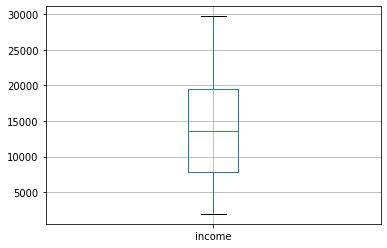

In [164]:
#построим диаграмы размаха чтобы проверить скошенность 
ultra_income_user_stat.boxplot()

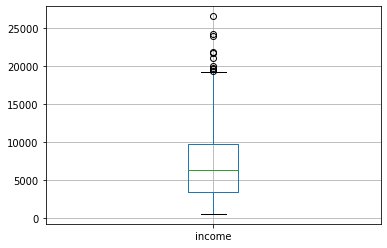

In [165]:
smart_income_user_stat.boxplot()

Медена тарифа ultra почти в два раза больше медианы тарифа smart, то же самое качается и средних.
В тарифе smart есть пользователи, которые принесли прибыль компании от 19 000  до 25 000р каждый, 
однако их количество не существенно и значения находястя в зоне выбросов. Змаетной скошенности 
в распределении прибыли по обоим тарифом тоже нет.

### Общий вывод 

1. Пользоватили ultrа активней пользуются услугами оператора, следовательно (и как подтвердилось в предыдущем пункте) приносят в среднем больше прибыли компании. 
2. Пользователй ultra меньше пользователей smart в ~2,4 раза, следовательно есть смысл вкладывать
в продвижение ultra, т.к. часть клиентов могут перейти на него со smart и увеличить прибыль компании.
3. С точки зрения клиента, если принебречь высокой ценой тарифа ultra, тариф в целом удовлетворяет потребности пользователей, особенно там, где у smart есть неудобства - интернет траффик. Средний пользователь превышает бесплатный лимит и вынужден доплачивать за каждый Гб интернет трафика, что психологичкси неудобно в сравнении с единовременной оплатой в случае ultra, где в среднем пользователи укладываются в 20Гб лимита и не доплачивают за издержки.

Вывод - тариф ultra выгодней для компании, и имеет более высокий приоритет развития
